In [1]:
# Simple Sudoku Digit Classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import keras
from pathlib import Path
import sys

# Add src to path for dataset loading
sys.path.append(str(Path.cwd().parent))
from training.dataset import retrieve_digit_dataset

# Set random seeds
np.random.seed(42)
keras.utils.set_random_seed(42)

print("Environment ready!")


Environment ready!


In [2]:
# Load and explore dataset
print("Loading dataset...")
X, y = retrieve_digit_dataset('../../data/digits', return_categorical=False)
print(f"Dataset loaded: {X.shape[0]} samples")
print(f"Image shape: {X.shape[1:]}")

# Check label distribution
unique, counts = np.unique(y, return_counts=True)
print(f"\nLabel distribution:")
for label, count in zip(unique, counts):
    print(f"  Digit {label}: {count} samples")

# Convert to categorical
y_categorical = keras.utils.to_categorical(y, num_classes=10)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Loading dataset...
Dataset loaded: 1324 samples
Image shape: (28, 28, 1)

Label distribution:
  Digit 0: 287 samples
  Digit 1: 114 samples
  Digit 2: 117 samples
  Digit 3: 117 samples
  Digit 4: 112 samples
  Digit 5: 116 samples
  Digit 6: 113 samples
  Digit 7: 119 samples
  Digit 8: 115 samples
  Digit 9: 114 samples

Train set: 1059 samples
Test set: 265 samples


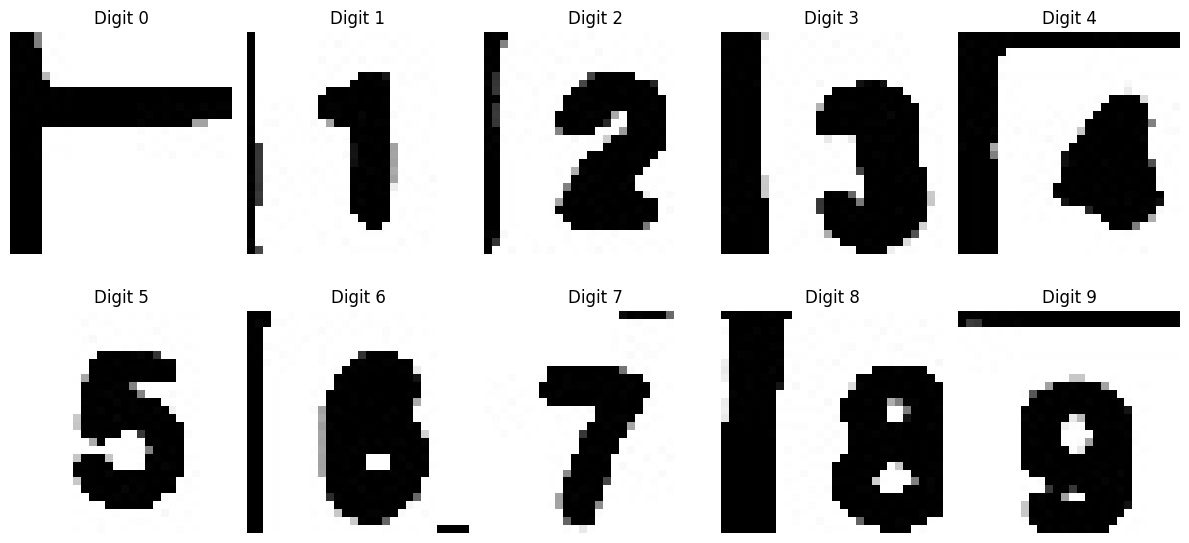

In [3]:
# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    # Find first occurrence of each digit
    digit_idx = np.where(y == i)[0][0]
    row, col = i // 5, i % 5
    axes[row, col].imshow(X[digit_idx].squeeze(), cmap='gray')
    axes[row, col].set_title(f'Digit {i}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()


In [4]:
# Create simple Sequential model
def create_simple_model(input_shape=(50, 50, 1), num_classes=10):
    model = keras.Sequential([
        keras.layers.Conv2D(64, (3, 3), activation="swish", input_shape=input_shape, padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.4),

        keras.layers.Conv2D(64, (3, 3), activation="swish", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.4),

        keras.layers.Conv2D(32, (2, 2), activation="swish", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),

        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(128, activation="swish"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax")
    ])
    return model

        # Define layers


# Create and compile model
model = create_simple_model()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model created!")
print(f"Parameters: {model.count_params():,}")
model.summary()


Model created!
Parameters: 51,946


/Users/christophersemling/projects/sudoku_solver/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,946 (202.91 KB)

 Trainable params: 51,626 (201.66 KB)

 Non-trainable params: 320 (1.25 KB)

In [5]:
# Train the model
print("Training model...")
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=75,
    validation_data=(X_test, y_test),
    verbose=1
)

print("Training completed!")


Training model...
Epoch 1/75
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2937 - loss: 1.9812 - val_accuracy: 0.2189 - val_loss: 2.2338
Epoch 2/75
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3333 - loss: 1.7538 - val_accuracy: 0.2189 - val_loss: 2.5583
Epoch 3/75
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4060 - loss: 1.6597 - val_accuracy: 0.2189 - val_loss: 3.0029
Epoch 4/75
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4533 - loss: 1.5448 - val_accuracy: 0.2189 - val_loss: 3.8427
Epoch 5/75
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5042 - loss: 1.4067 - val_accuracy: 0.2189 - val_loss: 4.7916
Epoch 6/75
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5647 - loss: 1.2361 - val_accuracy: 0.2189 - val_loss: 5.9906
Epoch 7/75
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6402 - loss: 1.0981 - val_accuracy: 0.2189 - val_loss: 6.3883
Epoch 8/75
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6676 - loss: 0.9862 - val_ac

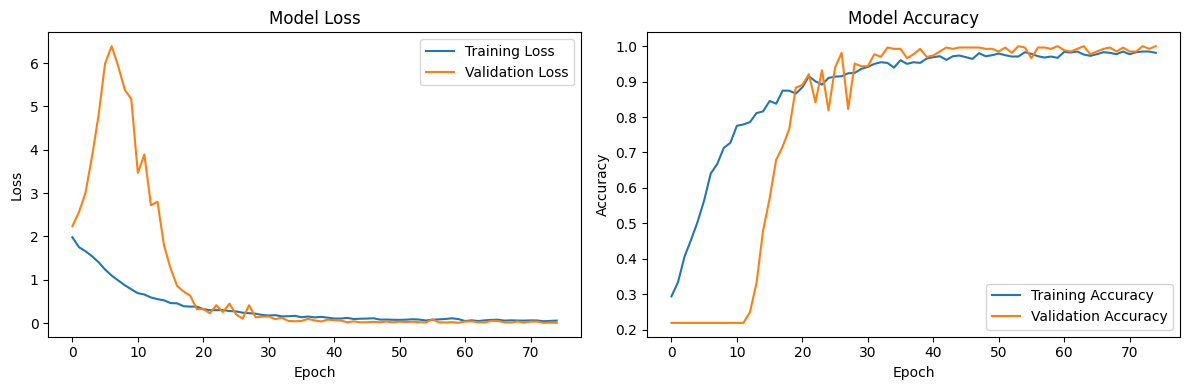

In [6]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Test Accuracy: 1.0000
Test Loss: 0.0066
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


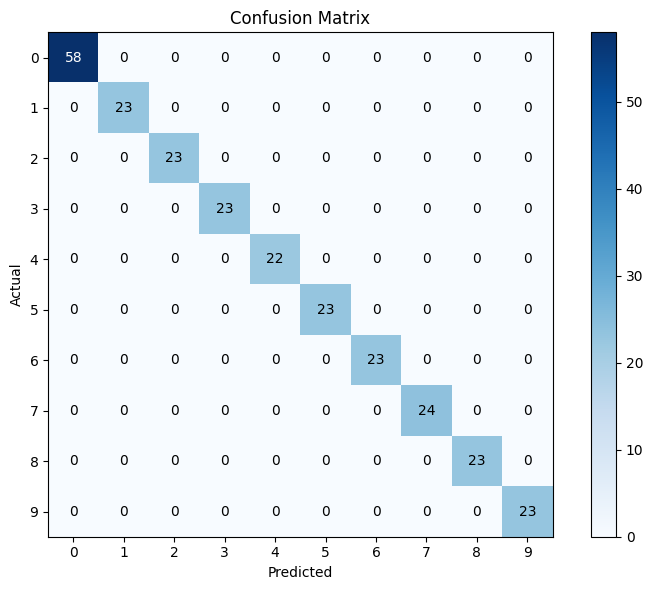

In [7]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [8]:
# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, 
                          target_names=[str(i) for i in range(10)]))

# Per-digit accuracy
print("\nPer-digit accuracy:")
for digit in range(10):
    digit_mask = y_true_classes == digit
    if np.any(digit_mask):
        digit_accuracy = np.mean(y_pred_classes[digit_mask] == digit)
        print(f"  Digit {digit}: {digit_accuracy:.3f}")

# Show some misclassified examples
misclassified = np.where(y_pred_classes != y_true_classes)[0]
if len(misclassified) > 0:
    print(f"\nShowing {min(10, len(misclassified))} misclassified examples:")
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(min(10, len(misclassified))):
        idx = misclassified[i]
        row, col = i // 5, i % 5
        axes[row, col].imshow(X_test[idx].squeeze(), cmap='gray')
        axes[row, col].set_title(f'True: {y_true_classes[idx]}, Pred: {y_pred_classes[idx]}')
        axes[row, col].axis('off')
    plt.tight_layout()
    plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        23

    accuracy                           1.00       265
   macro avg       1.00      1.00      1.00       265
weighted avg       1.00      1.00      1.00       265


Per-digit accuracy:
  Digit 0: 1.000
  Digit 1: 1.000
  Digit 2: 1.000
  Digit 3: 1.000
  Digit 4: 1.000
  Digit 5: 1.000
  Digit 6: 1.000
  Digit 7: 1.000
  Digit 8: 1.000
  Digit 9: 1.000


In [12]:
from pprint import pprint

pprint(y_pred[0])

array([9.9999857e-01, 4.4929729e-07, 1.5070664e-10, 3.8580272e-10,
       3.7202682e-11, 3.9748898e-09, 2.1324242e-12, 9.7928762e-07,
       4.2444334e-08, 7.2190531e-10], dtype=float32)
